# Imports  

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import  Bar, Layout, Figure
from plotly import __version__
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from pathlib import Path
from typing import Iterable, Set
import sys
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))


% matplotlib inline

sys.path.append('/home/laugustyniak/github/phd/sentiment-backend/')

from aspects.analysis import statistics_dataset
from aspects.analysis import nlp_architect

init_notebook_mode(connected=True)

In [3]:
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()
scmamp = importr('scmamp')

In [51]:
results_path = Path('/home/laugustyniak/luk.augustyniak@gmail.com/Projects/PRELUDIUM/Artykuły/aspect-based sentiment 2018/journal')

In [52]:
results_path.mkdir(parents=True, exist_ok=True)

In [53]:
dataset_sub_name = 'restaurants'
# dataset_sub_name = 'laptops'

In [54]:
# EMBEDDINGS_SUBSET = ['fastText', 'Amazon Reviews', 'numberbatch', 'Glove 840B', 'word2vec']

In [55]:
embedding_names = {
    'wiki-news-300d-1M': 'fastText-wiki', 
    'glove.42B.300d': 'Glove.42B', 
    'crawl-300d-2M': 'fastText-crawl', 
    'sentic2vec': 'Amazon Reviews',
    'glove.6B.100d': 'Glove.6B.100', 
    'numberbatch-en': 'numberbatch', 
    'glove.6B.50d': 'Glove.6B.50', 
    'glove.840B.300d': 'Glove.840B',
    'glove.6B.200d': 'Glove.6B.200', 
    'glove.6B.300d': 'Glove.6B.300', 
    'GoogleNews-vectors-negative300': 'word2vec'
}

method_names = {
    'word lstm': 'Wo-LSTM',
    'word lstm crf': 'Wo-LSTM-CRF',
    'char word lstm': 'WoCh-LSTM',
    'char word lstm crf': 'WoCh-LSTM-CRF',
    'word bilstm': 'Wo-BiLSTM',
    'word bilstm crf': 'Wo-BiLSTM-CRF',
    'char word bilstm': 'WoCh-BiLSTM',
    'char word bilstm crf': 'WoCh-BiLSTM-CRF',
}

In [56]:
word_embedding_reindex = [
    'Glove.840B',
    'Glove.42B', 
    'fastText-wiki', 
    'fastText-crawl', 
    'word2vec',
    'Amazon Reviews',
    'numberbatch', 
    'Glove.6B.50', 
    'Glove.6B.100', 
    'Glove.6B.200', 
    'Glove.6B.300', 
]

# Get all results in one Data Frame

In [57]:
nlp_architect.get_models_f1_metric(
        Path(
            f'../../../nlp-architect/examples/aspect_extraction/models-oxygen-1/models'
        ), dataset_sub_name, embedding_names)

fastText-wiki  Glove.42B  fastText-crawl  Amazon Reviews  \
Wo-LSTM                  77.00      81.26           80.77           47.89   
WoCh-LSTM                77.09      81.91           80.02           65.50   
Wo-LSTM-CRF              83.21      84.51           84.28           52.23   
WoCh-LSTM-CRF            84.39      83.92           84.91           71.10   
Wo-BiLSTM                76.88      82.06           82.86           49.10   
WoCh-BiLSTM              80.12      82.51           82.09           69.70   
Wo-BiLSTM-CRF            82.82      82.82           84.25           50.03   
WoCh-BiLSTM-CRF          83.97      85.12           84.94           71.09   

                 Glove.6B.100  numberbatch  Glove.6B.50  Glove.840B  \
Wo-LSTM                 76.66        75.84        67.57       81.23   
WoCh-LSTM               77.32        77.26        74.45       80.61   
Wo-LSTM-CRF             80.83        79.72        74.84       83.86   
WoCh-LSTM-CRF           81.37        81.91        77.84       83.56   
Wo-BiLSTM               80.67        78.48        76.06       82.85   
WoCh-BiLSTM             80.94        79.96        78.03       82.69   
Wo-BiLSTM-CRF           82.89        81.26        78.40       83.27   
WoCh-BiLSTM-CRF         83.72        81.44        79.52       84.10   

                 Glove.6B.200  Glove.6B.300  word2vec  
Wo-LSTM                 79.29         78.78     76.99  
WoCh-LSTM               78.24         78.36     78.14  
Wo-LSTM-CRF             82.61         80.43     82.06  
WoCh-LSTM-CRF           82.49         81.04     83.05  
Wo-BiLSTM               80.84         81.30     79.66  
WoCh-BiLSTM             80.09         81.29     80.55  
Wo-BiLSTM-CRF           83.13         82.49     81.61  
WoCh-BiLSTM-CRF         82.69         82.87     83.33

In [58]:
results_df = nlp_architect.merge_embeddings_and_architectures_results([
    nlp_architect.get_models_f1_metric(
        Path(
            f'../../../nlp-architect/examples/aspect_extraction/models-oxygen-{str(i)}/models'
        ), dataset_sub_name, embedding_names) for i in range(1, 6)
])

In [59]:
results_df

fastText-wiki  \
Wo-BiLSTM         [76.88, 80.65, 81.58, 81.96, 78.2]   
Wo-BiLSTM-CRF      [82.82, 82.3, 83.67, 84.01, 85.3]   
Wo-LSTM             [77.0, 74.28, 78.05, 77.4, 76.6]   
Wo-LSTM-CRF      [83.21, 84.11, 82.49, 83.65, 83.69]   
WoCh-BiLSTM      [80.12, 82.31, 79.62, 80.68, 81.04]   
WoCh-BiLSTM-CRF   [83.97, 83.03, 83.86, 83.6, 83.26]   
WoCh-LSTM        [77.09, 78.12, 77.16, 77.91, 78.41]   
WoCh-LSTM-CRF     [84.39, 83.9, 82.94, 84.64, 83.92]   

                                           Glove.42B  \
Wo-BiLSTM         [82.06, 82.72, 81.73, 82.2, 81.69]   
Wo-BiLSTM-CRF    [82.82, 84.91, 84.39, 85.46, 82.29]   
Wo-LSTM            [81.26, 79.5, 80.2, 80.56, 79.88]   
Wo-LSTM-CRF      [84.51, 84.23, 84.62, 85.06, 84.78]   
WoCh-BiLSTM      [82.51, 82.89, 84.01, 80.82, 82.95]   
WoCh-BiLSTM-CRF  [85.12, 85.61, 84.92, 84.46, 85.14]   
WoCh-LSTM         [81.91, 80.27, 80.2, 79.36, 77.82]   
WoCh-LSTM-CRF     [83.92, 84.38, 84.8, 85.18, 83.59]   

                                      fastText-crawl  \
Wo-BiLSTM        [82.86, 82.77, 81.77, 81.93, 81.52]   
Wo-BiLSTM-CRF     [84.25, 84.43, 84.17, 83.56, 85.0]   
Wo-LSTM           [80.77, 79.91, 81.47, 79.77, 77.1]   
Wo-LSTM-CRF      [84.28, 84.35, 84.74, 84.26, 84.69]   
WoCh-BiLSTM      [82.09, 82.48, 81.36, 82.15, 83.25]   
WoCh-BiLSTM-CRF  [84.94, 83.52, 85.31, 85.14, 84.53]   
WoCh-LSTM        [80.02, 81.19, 76.91, 76.53, 79.89]   
WoCh-LSTM-CRF    [84.91, 83.69, 84.46, 83.77, 84.43]   

                                      Amazon Reviews  \
Wo-BiLSTM          [49.1, 50.37, 50.0, 47.97, 50.03]   
Wo-BiLSTM-CRF    [50.03, 49.21, 49.97, 50.08, 48.86]   
Wo-LSTM          [47.89, 47.65, 48.32, 45.99, 49.07]   
Wo-LSTM-CRF       [52.23, 50.66, 50.7, 49.69, 52.17]   
WoCh-BiLSTM       [69.7, 69.99, 68.44, 68.79, 65.71]   
WoCh-BiLSTM-CRF  [71.09, 73.29, 72.42, 72.05, 73.64]   
WoCh-LSTM         [65.5, 65.83, 60.29, 66.73, 65.71]   
WoCh-LSTM-CRF     [71.1, 72.76, 71.36, 72.34, 71.63]   

                                        Glove.6B.100  \
Wo-BiLSTM         [80.67, 80.43, 80.0, 79.96, 80.45]   
Wo-BiLSTM-CRF    [82.89, 83.61, 82.95, 82.21, 83.41]   
Wo-LSTM          [76.66, 75.09, 71.31, 73.03, 74.11]   
Wo-LSTM-CRF      [80.83, 81.91, 81.53, 82.12, 81.23]   
WoCh-BiLSTM        [80.94, 80.07, 79.0, 74.4, 77.94]   
WoCh-BiLSTM-CRF  [83.72, 82.85, 82.78, 83.14, 83.33]   
WoCh-LSTM         [77.32, 77.41, 77.97, 76.02, 76.5]   
WoCh-LSTM-CRF    [81.37, 82.75, 81.44, 81.55, 81.82]   

                                         numberbatch  \
Wo-BiLSTM         [78.48, 78.84, 75.93, 77.0, 77.58]   
Wo-BiLSTM-CRF    [81.26, 80.45, 81.76, 81.43, 81.66]   
Wo-LSTM           [75.84, 75.66, 75.6, 73.79, 75.41]   
Wo-LSTM-CRF      [79.72, 82.09, 81.73, 80.88, 81.55]   
WoCh-BiLSTM      [79.96, 79.98, 79.57, 80.29, 79.63]   
WoCh-BiLSTM-CRF  [81.44, 82.16, 81.49, 82.48, 81.66]   
WoCh-LSTM        [77.26, 76.01, 72.11, 76.43, 73.73]   
WoCh-LSTM-CRF     [81.91, 82.45, 82.08, 81.47, 81.7]   

                                         Glove.6B.50  \
Wo-BiLSTM        [76.06, 73.92, 74.63, 75.12, 75.12]   
Wo-BiLSTM-CRF     [78.4, 78.27, 78.04, 76.81, 78.64]   
Wo-LSTM          [67.57, 64.86, 72.95, 69.05, 71.75]   
Wo-LSTM-CRF       [74.84, 76.32, 75.77, 74.65, 74.2]   
WoCh-BiLSTM      [78.03, 77.42, 75.11, 74.93, 77.69]   
WoCh-BiLSTM-CRF  [79.52, 80.09, 79.51, 80.47, 79.35]   
WoCh-LSTM        [74.45, 69.62, 71.69, 73.24, 72.76]   
WoCh-LSTM-CRF      [77.84, 78.0, 78.59, 78.5, 78.95]   

                                          Glove.840B  \
Wo-BiLSTM        [82.85, 82.54, 82.61, 82.17, 82.62]   
Wo-BiLSTM-CRF    [83.27, 84.62, 84.38, 84.15, 83.37]   
Wo-LSTM          [81.23, 81.22, 79.29, 78.57, 79.24]   
Wo-LSTM-CRF      [83.86, 84.17, 84.16, 83.65, 84.28]   
WoCh-BiLSTM        [82.69, 82.6, 82.35, 82.11, 83.0]   
WoCh-BiLSTM-CRF    [84.1, 84.11, 84.17, 83.9, 84.72]   
WoCh-LSTM        [80.61, 80.42, 79.66, 80.72, 79.88]   
WoCh-LSTM-CRF    [83.56, 83.69, 84.57, 83.64, 84.11]   


# Calculate result's mean and std 

In [60]:
pd.DataFrame({
        embedding: {
            architecture: round(np.mean(metrics), 2) + 1
            for architecture, metrics in architecture_metric.items()
        }
        for embedding, architecture_metric in results_df.to_dict().items()
    })

fastText-wiki  Glove.42B  fastText-crawl  Amazon Reviews  \
Wo-BiLSTM                80.85      83.08           83.17           50.49   
Wo-BiLSTM-CRF            84.62      84.97           85.28           50.63   
Wo-LSTM                  77.67      81.28           80.80           48.78   
Wo-LSTM-CRF              84.43      85.64           85.46           52.09   
WoCh-BiLSTM              81.75      83.64           83.27           69.53   
WoCh-BiLSTM-CRF          84.54      86.05           85.69           73.50   
WoCh-LSTM                78.74      80.91           79.91           65.81   
WoCh-LSTM-CRF            84.96      85.37           85.25           72.84   

                 Glove.6B.100  numberbatch  Glove.6B.50  Glove.840B  \
Wo-BiLSTM               81.30        78.57        75.97       83.56   
Wo-BiLSTM-CRF           84.01        82.31        79.03       84.96   
Wo-LSTM                 75.04        76.26        70.24       80.91   
Wo-LSTM-CRF             82.52        82.19        76.16       85.02   
WoCh-BiLSTM             79.47        80.89        77.64       83.55   
WoCh-BiLSTM-CRF         84.16        82.85        80.79       85.20   
WoCh-LSTM               78.04        76.11        73.35       81.26   
WoCh-LSTM-CRF           82.79        82.92        79.38       84.91   

                 Glove.6B.200  Glove.6B.300  word2vec  
Wo-BiLSTM               82.09         81.31     80.16  
Wo-BiLSTM-CRF           83.81         82.99     82.94  
Wo-LSTM                 78.69         79.22     77.73  
Wo-LSTM-CRF             83.26         82.70     82.49  
WoCh-BiLSTM             80.87         81.50     81.39  
WoCh-BiLSTM-CRF         83.74         83.26     83.61  
WoCh-LSTM               78.30         78.70     78.15  
WoCh-LSTM-CRF           83.30         82.56     84.12

In [61]:
def count_mean_and_std_dev_for_each_cell(results_df: pd.DataFrame):
    return pd.DataFrame({
        embedding: {
            architecture: round(np.mean(metrics), 2) + 1
            for architecture, metrics in architecture_metric.items()
        }
        for embedding, architecture_metric in results_df.to_dict().items()
    })

In [62]:
results_df_avg = count_mean_and_std_dev_for_each_cell(results_df).reindex(nlp_architect.REINDEX_RESULTS_ORDER)
results_df_avg = results_df_avg.reindex(word_embedding_reindex, axis=1)
results_df_avg.to_excel((results_path / f'{dataset_sub_name}-aspects-5-runs.xlsx').as_posix())
results_df_avg

Glove.840B  Glove.42B  fastText-wiki  fastText-crawl  \
Wo-LSTM               80.91      81.28          77.67           80.80   
WoCh-LSTM             81.26      80.91          78.74           79.91   
Wo-LSTM-CRF           85.02      85.64          84.43           85.46   
WoCh-LSTM-CRF         84.91      85.37          84.96           85.25   
Wo-BiLSTM             83.56      83.08          80.85           83.17   
WoCh-BiLSTM           83.55      83.64          81.75           83.27   
Wo-BiLSTM-CRF         84.96      84.97          84.62           85.28   
WoCh-BiLSTM-CRF       85.20      86.05          84.54           85.69   

                 word2vec  Amazon Reviews  numberbatch  Glove.6B.50  \
Wo-LSTM             77.73           48.78        76.26        70.24   
WoCh-LSTM           78.15           65.81        76.11        73.35   
Wo-LSTM-CRF         82.49           52.09        82.19        76.16   
WoCh-LSTM-CRF       84.12           72.84        82.92        79.38   
Wo-BiLSTM           80.16           50.49        78.57        75.97   
WoCh-BiLSTM         81.39           69.53        80.89        77.64   
Wo-BiLSTM-CRF       82.94           50.63        82.31        79.03   
WoCh-BiLSTM-CRF     83.61           73.50        82.85        80.79   

                 Glove.6B.100  Glove.6B.200  Glove.6B.300  
Wo-LSTM                 75.04         78.69         79.22  
WoCh-LSTM               78.04         78.30         78.70  
Wo-LSTM-CRF             82.52         83.26         82.70  
WoCh-LSTM-CRF           82.79         83.30         82.56  
Wo-BiLSTM               81.30         82.09         81.31  
WoCh-BiLSTM             79.47         80.87         81.50  
Wo-BiLSTM-CRF           84.01         83.81         82.99  
WoCh-BiLSTM-CRF         84.16         83.74         83.26

In [36]:
results_df_avg = results_df_avg.reindex(word_embedding_reindex, axis=1)

In [37]:
print(results_df_avg.transpose().to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  Wo-LSTM &  WoCh-LSTM &  Wo-LSTM-CRF &  WoCh-LSTM-CRF &  Wo-BiLSTM &  WoCh-BiLSTM &  Wo-BiLSTM-CRF &  WoCh-BiLSTM-CRF \\
\midrule
Glove.840B     &    68.38 &      70.09 &        77.72 &          77.66 &      74.25 &        73.38 &          79.99 &            80.13 \\
Glove.42B      &    69.44 &      68.47 &        77.39 &          78.36 &      74.78 &        74.11 &          81.08 &            79.21 \\
fastText-wiki  &    60.32 &      58.96 &        74.66 &          75.93 &      63.54 &        63.66 &          77.05 &            77.04 \\
fastText-crawl &    67.75 &      66.71 &        77.95 &          77.53 &      73.32 &        73.44 &          79.34 &            79.73 \\
word2vec       &    61.59 &      64.10 &        72.88 &          75.44 &      67.96 &        69.77 &          74.93 &            76.38 \\
Amazon Reviews &    55.18 &      60.01 &        65.15 &          70.04 &      61.22 &        66.06 &          64.89 &            69.65 \\
n

In [38]:
max_values_per_columns = results_df_avg.transpose().max(axis=1).to_dict()

In [39]:
max_values_per_columns

{'Glove.840B': 80.13,
 'Glove.42B': 81.08,
 'fastText-wiki': 77.05,
 'fastText-crawl': 79.73,
 'word2vec': 76.38,
 'Amazon Reviews': 70.04,
 'numberbatch': 75.09,
 'Glove.6B.50': 72.05,
 'Glove.6B.100': 76.44,
 'Glove.6B.200': 78.22,
 'Glove.6B.300': 77.4}

# Results with +/- std  

In [40]:
def count_mean_and_std_dev_for_each_cell_tex_ready(results_df: pd.DataFrame):
    return pd.DataFrame({
        embedding: {
            architecture: ' scriptsize{' + str(round(np.mean(metrics), 2) + 1) + ' +/- ' + str(
                round(np.std(metrics), 2)) + '}'
            for architecture, metrics in architecture_metric.items()
        }
        for embedding, architecture_metric in results_df.to_dict().items()
    })

In [41]:
df_results_with_std = count_mean_and_std_dev_for_each_cell_tex_ready(results_df).reindex(nlp_architect.REINDEX_RESULTS_ORDER)
df_results_with_std.to_excel((results_path / f'{dataset_sub_name}-aspects-with-std.xlsx').as_posix())
df_results_with_std

fastText-wiki                    Glove.42B  \
Wo-LSTM           scriptsize{60.32 +/- 4.55}   scriptsize{69.44 +/- 2.13}   
WoCh-LSTM         scriptsize{58.96 +/- 2.42}   scriptsize{68.47 +/- 1.73}   
Wo-LSTM-CRF       scriptsize{74.66 +/- 1.49}   scriptsize{77.39 +/- 0.63}   
WoCh-LSTM-CRF     scriptsize{75.93 +/- 0.81}   scriptsize{78.36 +/- 1.17}   
Wo-BiLSTM         scriptsize{63.54 +/- 4.15}   scriptsize{74.78 +/- 1.46}   
WoCh-BiLSTM       scriptsize{63.66 +/- 4.49}   scriptsize{74.11 +/- 1.19}   
Wo-BiLSTM-CRF     scriptsize{77.05 +/- 2.18}   scriptsize{81.08 +/- 0.69}   
WoCh-BiLSTM-CRF   scriptsize{77.04 +/- 2.45}   scriptsize{79.21 +/- 0.46}   

                              fastText-crawl               Amazon Reviews  \
Wo-LSTM           scriptsize{67.75 +/- 4.05}   scriptsize{55.18 +/- 1.77}   
WoCh-LSTM         scriptsize{66.71 +/- 4.88}   scriptsize{60.01 +/- 1.18}   
Wo-LSTM-CRF       scriptsize{77.95 +/- 1.79}   scriptsize{65.15 +/- 0.73}   
WoCh-LSTM-CRF     scriptsize{77.53 +/- 0.93}    scriptsize{70.04 +/- 1.3}   
Wo-BiLSTM         scriptsize{73.32 +/- 1.32}   scriptsize{61.22 +/- 1.14}   
WoCh-BiLSTM       scriptsize{73.44 +/- 2.77}   scriptsize{66.06 +/- 1.11}   
Wo-BiLSTM-CRF     scriptsize{79.34 +/- 1.23}   scriptsize{64.89 +/- 0.75}   
WoCh-BiLSTM-CRF   scriptsize{79.73 +/- 1.36}   scriptsize{69.65 +/- 0.97}   

                                Glove.6B.100                  numberbatch  \
Wo-LSTM            scriptsize{58.0 +/- 3.98}   scriptsize{57.88 +/- 2.48}   
WoCh-LSTM         scriptsize{61.64 +/- 1.92}   scriptsize{58.77 +/- 3.86}   
Wo-LSTM-CRF       scriptsize{73.26 +/- 2.07}    scriptsize{69.19 +/- 2.5}   
WoCh-LSTM-CRF     scriptsize{72.97 +/- 1.55}   scriptsize{74.15 +/- 0.39}   
Wo-BiLSTM         scriptsize{65.94 +/- 3.21}   scriptsize{59.02 +/- 7.19}   
WoCh-BiLSTM       scriptsize{68.26 +/- 0.89}   scriptsize{66.69 +/- 2.07}   
Wo-BiLSTM-CRF     scriptsize{76.44 +/- 3.29}   scriptsize{73.03 +/- 1.02}   
WoCh-BiLSTM-CRF   scriptsize{75.88 +/- 2.22}   scriptsize{75.09 +/- 1.75}   

                                 Glove.6B.50                   Glove.840B  \
Wo-LSTM           scriptsize{41.77 +/- 6.04}   scriptsize{68.38 +/- 3.61}   
WoCh-LSTM          scriptsize{48.5 +/- 8.45}   scriptsize{70.09 +/- 0.61}   
Wo-LSTM-CRF       scriptsize{58.48 +/- 1.18}   scriptsize{77.72 +/- 1.42}   
WoCh-LSTM-CRF     scriptsize{65.12 +/- 2.48}   scriptsize{77.66 +/- 0.46}   
Wo-BiLSTM         scriptsize{53.71 +/- 1.18}   scriptsize{74.25 +/- 0.87}   
WoCh-BiLSTM       scriptsize{60.19 +/- 4.27}   scriptsize{73.38 +/- 2.46}   
Wo-BiLSTM-CRF     scriptsize{64.39 +/- 3.51}   scriptsize{79.99 +/- 0.72}   
WoCh-BiLSTM-CRF   scriptsize{72.05 +/- 1.39}   scriptsize{80.13 +/- 0.34}   

                                Glove.6B.200                 Glove.6B.300  \
Wo-LSTM           scriptsize{63.69 +/- 2.15}   scriptsize{65.82 +/- 2.33}   
WoCh-LSTM         scriptsize{64.39 +/- 2.07}    scriptsize{65.59 +/- 1.7}   
Wo-LSTM-CRF       scriptsize{76.94 +/- 0.96}   scriptsize{74.51 +/- 1.98}   
WoCh-LSTM-CRF      scriptsize{75.0 +/- 0.99}   scriptsize{75.15 +/- 0.54}   
Wo-BiLSTM         scriptsize{69.71 +/- 2.83}    scriptsize{72.2 +/- 1.39}   
WoCh-BiLSTM       scriptsize{68.98 +/- 2.34}   scriptsize{71.32 +/- 0.82}   
Wo-BiLSTM-CRF     scriptsize{78.22 +/- 1.67}   scriptsize{77.28 +/- 0.87}   
WoCh-BiLSTM-CRF   scriptsize{77.77 +/- 1.47}    scriptsize{77.4 +/- 0.24}   

                                    word2vec  
Wo-LSTM           scriptsize{61.59 +/- 2.43}  
WoCh-LSTM          scriptsize{64.1 +/- 2.67}  
Wo-LSTM-CRF       scriptsize{72.88 +/- 1.12}  
WoCh-LSTM-CRF     scriptsize{75.44 +/- 1.57}  
Wo-BiLSTM         scriptsize{67.96 +/- 2.15}  
WoCh-BiLSTM       scriptsize{69.77 +/- 2.84}  
Wo-BiLSTM-CRF      scriptsize{74.93 +/- 1.0}  
WoCh-BiLSTM-CRF   scriptsize{76.38 +/- 1.37}

In [42]:
# print(df_results_with_std[EMBEDDINGS_SUBSET].to_latex())
print(df_results_with_std.to_latex())

\begin{tabular}{llllllllllll}
\toprule
{} &                fastText-wiki &                    Glove.42B &               fastText-crawl &               Amazon Reviews &                 Glove.6B.100 &                  numberbatch &                  Glove.6B.50 &                   Glove.840B &                 Glove.6B.200 &                 Glove.6B.300 &                     word2vec \\
\midrule
Wo-LSTM         &   scriptsize\{60.32 +/- 4.55\} &   scriptsize\{69.44 +/- 2.13\} &   scriptsize\{67.75 +/- 4.05\} &   scriptsize\{55.18 +/- 1.77\} &    scriptsize\{58.0 +/- 3.98\} &   scriptsize\{57.88 +/- 2.48\} &   scriptsize\{41.77 +/- 6.04\} &   scriptsize\{68.38 +/- 3.61\} &   scriptsize\{63.69 +/- 2.15\} &   scriptsize\{65.82 +/- 2.33\} &   scriptsize\{61.59 +/- 2.43\} \\
WoCh-LSTM       &   scriptsize\{58.96 +/- 2.42\} &   scriptsize\{68.47 +/- 1.73\} &   scriptsize\{66.71 +/- 4.88\} &   scriptsize\{60.01 +/- 1.18\} &   scriptsize\{61.64 +/- 1.92\} &   scriptsize\{58.77 +/- 3.86\} &    scri

#  Plot graphs with error bars

In [43]:
results_df_avg

Glove.840B  Glove.42B  fastText-wiki  fastText-crawl  \
Wo-LSTM               68.38      69.44          60.32           67.75   
WoCh-LSTM             70.09      68.47          58.96           66.71   
Wo-LSTM-CRF           77.72      77.39          74.66           77.95   
WoCh-LSTM-CRF         77.66      78.36          75.93           77.53   
Wo-BiLSTM             74.25      74.78          63.54           73.32   
WoCh-BiLSTM           73.38      74.11          63.66           73.44   
Wo-BiLSTM-CRF         79.99      81.08          77.05           79.34   
WoCh-BiLSTM-CRF       80.13      79.21          77.04           79.73   

                 word2vec  Amazon Reviews  numberbatch  Glove.6B.50  \
Wo-LSTM             61.59           55.18        57.88        41.77   
WoCh-LSTM           64.10           60.01        58.77        48.50   
Wo-LSTM-CRF         72.88           65.15        69.19        58.48   
WoCh-LSTM-CRF       75.44           70.04        74.15        65.12   
Wo-BiLSTM           67.96           61.22        59.02        53.71   
WoCh-BiLSTM         69.77           66.06        66.69        60.19   
Wo-BiLSTM-CRF       74.93           64.89        73.03        64.39   
WoCh-BiLSTM-CRF     76.38           69.65        75.09        72.05   

                 Glove.6B.100  Glove.6B.200  Glove.6B.300  
Wo-LSTM                 58.00         63.69         65.82  
WoCh-LSTM               61.64         64.39         65.59  
Wo-LSTM-CRF             73.26         76.94         74.51  
WoCh-LSTM-CRF           72.97         75.00         75.15  
Wo-BiLSTM               65.94         69.71         72.20  
WoCh-BiLSTM             68.26         68.98         71.32  
Wo-BiLSTM-CRF           76.44         78.22         77.28  
WoCh-BiLSTM-CRF         75.88         77.77         77.40

In [44]:
def draw_bar_graph_count_mean_and_std_dev(results_df: pd.DataFrame):
    traces = []

    for embedding, architecture_metric in results_df.to_dict().items():
        ys = []
        xs = []
        error_y = []

        for architecture, metrics in architecture_metric.items():
            ys.append(round(np.mean(metrics), 2) + 1)
            xs.append(architecture)
            error_y.append(round(np.std(metrics), 2))

        traces.append(
            Bar(x=xs,
                y=ys,
                name=embedding,
                error_y=dict(type='data', array=error_y, visible=True)))

    layout = Layout(barmode='group')

    fig = Figure(data=traces, layout=layout)
    iplot(fig)

In [45]:
draw_bar_graph_count_mean_and_std_dev(results_df.transpose())

In [85]:
draw_bar_graph_count_mean_and_std_dev(results_df)

In [86]:
# lstms_pairs = [
#     ('')
# ]

In [87]:
results_df_avg.transpose()

Wo-LSTM  WoCh-LSTM  Wo-LSTM-CRF  WoCh-LSTM-CRF  Wo-BiLSTM  \
fastText-wiki     60.32      58.96        74.66          75.93      63.54   
Glove 42B         69.44      68.47        77.39          78.36      74.78   
fastText-crawl    67.75      66.71        77.95          77.53      73.32   
Amazon Reviews    55.18      60.01        65.15          70.04      61.22   
Glove 6B 100      58.00      61.64        73.26          72.97      65.94   
numberbatch       57.88      58.77        69.19          74.15      59.02   
Glove 6B 50       41.77      48.50        58.48          65.12      53.71   
Glove 840B        68.38      70.09        77.72          77.66      74.25   
Glove 6B 200      63.69      64.39        76.94          75.00      69.71   
Glove 6B 300      65.82      65.59        74.51          75.15      72.20   
word2vec          61.59      64.10        72.88          75.44      67.96   

                WoCh-BiLSTM  Wo-BiLSTM-CRF  WoCh-BiLSTM-CRF  
fastText-wiki         63.66          77.05            77.04  
Glove 42B             74.11          81.08            79.21  
fastText-crawl        73.44          79.34            79.73  
Amazon Reviews        66.06          64.89            69.65  
Glove 6B 100          68.26          76.44            75.88  
numberbatch           66.69          73.03            75.09  
Glove 6B 50           60.19          64.39            72.05  
Glove 840B            73.38          79.99            80.13  
Glove 6B 200          68.98          78.22            77.77  
Glove 6B 300          71.32          77.28            77.40  
word2vec              69.77          74.93            76.38

In [88]:
import seaborn as sns; sns.set(color_codes=True)

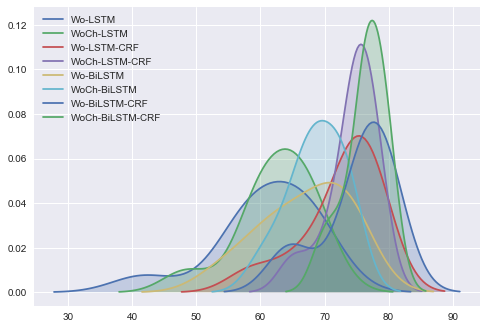

In [89]:
for nn in results_df_avg.index:
    sns.kdeplot(results_df_avg.transpose()[nn], shade=True)

# Statistical tests

## Nemeneyi 

In [90]:
results_df_avg

fastText-wiki  Glove 42B  fastText-crawl  Amazon Reviews  \
Wo-LSTM                  60.32      69.44           67.75           55.18   
WoCh-LSTM                58.96      68.47           66.71           60.01   
Wo-LSTM-CRF              74.66      77.39           77.95           65.15   
WoCh-LSTM-CRF            75.93      78.36           77.53           70.04   
Wo-BiLSTM                63.54      74.78           73.32           61.22   
WoCh-BiLSTM              63.66      74.11           73.44           66.06   
Wo-BiLSTM-CRF            77.05      81.08           79.34           64.89   
WoCh-BiLSTM-CRF          77.04      79.21           79.73           69.65   

                 Glove 6B 100  numberbatch  Glove 6B 50  Glove 840B  \
Wo-LSTM                 58.00        57.88        41.77       68.38   
WoCh-LSTM               61.64        58.77        48.50       70.09   
Wo-LSTM-CRF             73.26        69.19        58.48       77.72   
WoCh-LSTM-CRF           72.97        74.15        65.12       77.66   
Wo-BiLSTM               65.94        59.02        53.71       74.25   
WoCh-BiLSTM             68.26        66.69        60.19       73.38   
Wo-BiLSTM-CRF           76.44        73.03        64.39       79.99   
WoCh-BiLSTM-CRF         75.88        75.09        72.05       80.13   

                 Glove 6B 200  Glove 6B 300  word2vec  
Wo-LSTM                 63.69         65.82     61.59  
WoCh-LSTM               64.39         65.59     64.10  
Wo-LSTM-CRF             76.94         74.51     72.88  
WoCh-LSTM-CRF           75.00         75.15     75.44  
Wo-BiLSTM               69.71         72.20     67.96  
WoCh-BiLSTM             68.98         71.32     69.77  
Wo-BiLSTM-CRF           78.22         77.28     74.93  
WoCh-BiLSTM-CRF         77.77         77.40     76.38

### Models

In [91]:
r_df = pandas2ri.py2ri(results_df_avg.transpose())
scmamp.plotCD(r_df, alpha=0.01, cex=0.55)

TypeError: 'rpy2.rinterface.RNULLType' object is not iterable

R object with classes: ('list',) mapped to:
<ListVector - Python:0x7fbcf5673508 / R:0x5574b10e4348>
[RNULLType, RNULLType, RNULLType, RNULLType]
  <no name>: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  <no name>: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  <no name>: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  <no name>: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL

### Embeddings

In [92]:
r_df = pandas2ri.py2ri(results_df_avg)
scmamp.plotCD(r_df, alpha=0.01, cex=0.6)

TypeError: 'rpy2.rinterface.RNULLType' object is not iterable

R object with classes: ('list',) mapped to:
<ListVector - Python:0x7fbcf5668248 / R:0x5574b236c0c8>
[RNULLType, RNULLType]
  <no name>: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  <no name>: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL

## Bergmann

In [43]:
p_values = scmamp.friedmanAlignedRanksPost(r_df, use_rank = True)

In [44]:
p_values_bergmann_hommel_correction = scmamp.adjustBergmannHommel(p_values)

In [45]:
p_values_bergmann_hommel_correction

R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x7fbcc8f46e48 / R:0x5574b13827d0>
[NA_real_, 1.000000, 0.005401, 0.000015, ..., 0.001504, 0.043006, 0.895395, NA_real_]

In [134]:
from itertools import product

In [135]:
nn_architectures = list(results_df_avg.transpose().columns)
nn_architectures_product = list(product(nn_architectures, nn_architectures))

In [136]:
nn_architectures_p_values = tuple(p_values_bergmann_hommel_correction)

In [137]:
p_values_with_architectures = list(zip(nn_architectures_product, nn_architectures_p_values))

In [138]:
p_values_df = {name : {} for name in nn_architectures}
for nns, pv in p_values_with_architectures:
    p_values_df[nns[0]].update({nns[1] : pv})


In [139]:
pd.DataFrame.from_dict(p_values_df).reindex(reindex_results_order)

word lstm  char word lstm  word lstm crf  \
word lstm                   NaN        1.000000       0.115203   
char word lstm         1.000000             NaN       0.467324   
word lstm crf          0.115203        0.467324            NaN   
char word lstm crf     0.004187        0.032723       1.000000   
word bilstm            1.000000        1.000000       0.571669   
char word bilstm       0.366436        1.000000       1.000000   
word bilstm crf        0.119260        0.467324       1.000000   
char word bilstm crf   0.000571        0.006553       0.881192   

                      char word lstm crf  word bilstm  char word bilstm  \
word lstm                       0.004187     1.000000          0.366436   
char word lstm                  0.032723     1.000000          1.000000   
word lstm crf                   1.000000     0.571669          1.000000   
char word lstm crf                   NaN     0.050420          1.000000   
word bilstm                     0.050420          NaN          1.000000   
char word bilstm                1.000000     1.000000               NaN   
word bilstm crf                 1.000000     0.597241          1.000000   
char word bilstm crf            1.000000     0.011781          0.467324   

                      word bilstm crf  char word bilstm crf  
word lstm                    0.119260              0.000571  
char word lstm               0.467324              0.006553  
word lstm crf                1.000000              0.881192  
char word lstm crf           1.000000              1.000000  
word bilstm                  0.597241              0.011781  
char word bilstm             1.000000              0.467324  
word bilstm crf                   NaN              0.881192  
char word bilstm crf         0.881192                   NaN

In [30]:
# pd.DataFrame(p_values_with_architectures)

In [240]:
# friedman_test = scmamp.multipleComparisonTest(r_df, control = 'NoEmbedding', test='iman')
# friedman_p_value = friedman_test.rx2('p.value')[0]
# ranks, _, posthoc_pvals = scmamp.postHocTest(data=r_df, test="friedman", control = 'NoEmbedding', correct="holland", use_rank = True)

# Check coverage of words in embeddings for aspect datasets

## Create corpus 

In [4]:
corpus_words = statistics_dataset.get_unique_words_from_corpus()

Corpus iterator: 49475it [00:00, 652780.95it/s]
Corpus iterator: 53781it [00:00, 901801.27it/s]
Corpus iterator: 12470it [00:00, 820155.72it/s]
Corpus iterator: 13257it [00:00, 538802.59it/s]


In [5]:
def load_word_embeddings(file_path):
    with open(file_path, encoding='utf-8') as fp:
        words = []
        try:
            for line in tqdm_notebook(fp, desc=file_path + ': embedding loading'):
                line_fields = line.split()
                if len(line_fields) < 5:
                    continue
                else:
                    if line[0] == ' ':
                        pass
                    else:
                        word = line_fields[0]
                        try:
                            pass
                        except:
                            continue
                        words.append(word)
        except UnicodeDecodeError:
            pass
    return set(words)

In [6]:
EMBEDDINGS_PATH = Path('/home/laugustyniak/data/embeddings/')

EMBEDDINGS = [
    'GoogleNews-vectors-negative300.txt',
    'glove.6B.50d.txt',
    'glove.6B.100d.txt',
    'glove.6B.200d.txt',
    'glove.6B.300d.txt',
    'glove.twitter.27B.200d.txt',
    'glove.42B.300d.txt',
    'glove.840B.300d.txt',
    'numberbatch-en.txt',
    'crawl-300d-2M.vec',
#     'wiki-news-300d-1M-subword.vec',
    'wiki-news-300d-1M.vec',
#     'bow2.words',
#     'bow2.contexts',
#     'bow5.words',
#     'bow5.contexts',
#     'deps.words',
#     'deps.contexts',
#     'sota-google.txt',
#     'sota-retrofit-600.txt',
#     'sota-sswe-50.txt',
#     'sota-wiki-600.txt',
    'sentic2vec.txt',
#     'lexvec.commoncrawl.ngramsubwords.300d.W.pos.vectors',
#     'lexvec.enwiki+newscrawl.300d.W.pos.vectors',    
]

In [7]:
def get_word_embeddings_vocabularies(word_embedding_names):
    return {
        word_embedding_name: load_word_embeddings((EMBEDDINGS_PATH / word_embedding_name).as_posix())
        for word_embedding_name 
        in tqdm_notebook(word_embedding_names)
    }
   
word_embedding_vocabulalaries = get_word_embeddings_vocabularies(EMBEDDINGS)

In [8]:
def get_datasets_coverage_with_word_embedding(corpus_words, word_embedding_vocabulalaries):
    word_embedding_coverage = {}
    for word_embedding_name, vocabulary in word_embedding_vocabulalaries.items():
        word_embedding_coverage[word_embedding_name] = {
            corpus_name: len(words.difference(vocabulary))/len(words)
            for corpus_name, words
            in corpus_words.items()
        }
    return word_embedding_coverage

In [9]:
{k: len(v) for k, v in  corpus_words.items()}

{'Restaurants_poria-train': 4619,
 'Laptops_poria-train': 4238,
 'Laptops_poria-test': 1922,
 'Restaurants_poria-test': 2270}

In [10]:
{word_embedding_name: len(vocabulary) for word_embedding_name, vocabulary in word_embedding_vocabulalaries.items()}

{'GoogleNews-vectors-negative300.txt': 2999993,
 'glove.6B.50d.txt': 400000,
 'glove.6B.100d.txt': 400000,
 'glove.6B.200d.txt': 400000,
 'glove.6B.300d.txt': 400000,
 'glove.twitter.27B.200d.txt': 1193515,
 'glove.42B.300d.txt': 1917494,
 'glove.840B.300d.txt': 2195884,
 'numberbatch-en.txt': 417194,
 'crawl-300d-2M.vec': 1999995,
 'wiki-news-300d-1M.vec': 999994,
 'sentic2vec.txt': 42007}

In [11]:
datasets_coverage_with_word_embedding = get_datasets_coverage_with_word_embedding(corpus_words, word_embedding_vocabulalaries)

In [12]:
lack_of_words_percentage = pd.DataFrame(datasets_coverage_with_word_embedding).round(4)*100

In [89]:
lack_of_words_percentage.to_excel((results_path / 'word-embeddings-coverage.xlsx').as_posix())
lack_of_words_percentage

GoogleNews-vectors-negative300.txt  glove.6B.50d.txt  \
Laptops_poria-test                                     8.38              4.27   
Laptops_poria-train                                   11.14              9.18   
Restaurants_poria-test                                 9.25              7.40   
Restaurants_poria-train                               12.73             10.78   

                         glove.6B.100d.txt  glove.6B.200d.txt  \
Laptops_poria-test                    4.27               4.27   
Laptops_poria-train                   9.18               9.18   
Restaurants_poria-test                7.40               7.40   
Restaurants_poria-train              10.78              10.78   

                         glove.6B.300d.txt  glove.twitter.27B.200d.txt  \
Laptops_poria-test                    4.27                        8.17   
Laptops_poria-train                   9.18                       11.70   
Restaurants_poria-test                7.40                        8.63   
Restaurants_poria-train              10.78                       11.99   

                         glove.42B.300d.txt  glove.840B.300d.txt  \
Laptops_poria-test                     1.77                 2.24   
Laptops_poria-train                    3.40                 4.20   
Restaurants_poria-test                 3.66                 4.36   
Restaurants_poria-train                5.00                 6.11   

                         numberbatch-en.txt  crawl-300d-2M.vec  \
Laptops_poria-test                     9.83               2.39   
Laptops_poria-train                   14.06               4.32   
Restaurants_poria-test                 9.12               4.27   
Restaurants_poria-train               13.70               5.98   

                         wiki-news-300d-1M.vec  sentic2vec.txt  
Laptops_poria-test                        4.68           17.17  
Laptops_poria-train                       6.91           18.55  
Restaurants_poria-test                    6.70           32.20  
Restaurants_poria-train                   9.33           34.38

In [ ]:
print(pd.DataFrame.from_dict(aspects, orient='index', columns=['Multi aspect ']).to_latex())

## What exact words do not exist in WE 

In [29]:
crawl_laptops = corpus_words['Laptops_poria-test'].union(corpus_words['Laptops_poria-train']) | word_embedding_vocabulalaries['crawl-300d-2M.vec']

In [30]:
wiki_news_laptops = corpus_words['Restaurants_poria-test'].union(corpus_words['Restaurants_poria-train']) - word_embedding_vocabulalaries['wiki-news-300d-1M.vec']

In [34]:
crawl_laptops - wiki_news_laptops

{'07/2009',
 '1/10',
 '10/10',
 '1199.00',
 '1222nr',
 '15.4-',
 '1x4gb',
 '24/7',
 '244dx',
 '3dmark6',
 '6750m',
 ':-)',
 ':-d',
 ':]',
 ':d',
 ';p',
 '=)',
 "acer's",
 'amazon-cost',
 'another---lou',
 'anypne',
 "apple's",
 'aratings',
 "arn't",
 'babyed',
 'better-configured',
 'butprofessionally',
 "buy's",
 "c'mon",
 'c270',
 "cd's",
 'cliick',
 'comfterbale',
 'commputer',
 "company's",
 "computer's",
 'constandly',
 'contactus@euro.apple.com',
 'contaminants-my',
 'controlled-lighting',
 'crutchs',
 'cubersome',
 'cusromer',
 'de-corrupt',
 'deal--seemingly',
 "dell's",
 'depanable',
 'dhell',
 "dosen't",
 "dvd'd",
 'easy-to-function',
 'ex.iphoto',
 'expeirencing',
 'experine',
 'expese',
 'explantory',
 "eye'd",
 "family's",
 'firfox',
 'freesecuritysoftware',
 'froze-up',
 'fruit-named',
 'full-inch',
 'g73jh',
 'goodness-i',
 'hainv',
 'handiecap',
 "hasn't",
 'hewlitt',
 'hilghy',
 'hours-just',
 "husband's",
 "i'ts",
 "i'v",
 'ibookg',
 'in.mac',
 'interneting',
 'iphoto

In [32]:
'c270' in word_embedding_vocabulalaries['wiki-news-300d-1M.vec']

False

In [33]:
'c270' in word_embedding_vocabulalaries['crawl-300d-2M.vec']

False

In [14]:
word_embedding_vocabulalaries.keys()

dict_keys(['GoogleNews-vectors-negative300.txt', 'glove.6B.50d.txt', 'glove.6B.100d.txt', 'glove.6B.200d.txt', 'glove.6B.300d.txt', 'glove.twitter.27B.200d.txt', 'glove.42B.300d.txt', 'glove.840B.300d.txt', 'numberbatch-en.txt', 'crawl-300d-2M.vec', 'wiki-news-300d-1M.vec', 'sentic2vec.txt'])

# Words/aspects appeared in test data but not in training 

In [ ]:
from collections import namedtuple

## Words statistics 

In [ ]:
WordsStats = namedtuple('WordsStats', 'coverage, all_unique_words')

In [ ]:
def words_coverage_stats(train_words: Set, test_words: Set):
    all_words = train_words.union(test_words)
    intersection_words = train_words - test_words
    return WordsStats(
        len(intersection_words)/len(all_words),
        len(all_words)
    )

In [ ]:
words_coverage_stats(corpus_words[statistics_dataset.dataset_restaurants_train], corpus_words[statistics_dataset.dataset_restaurants_test])

In [ ]:
words_coverage_stats(corpus_words[statistics_dataset.dataset_laptops_train], corpus_words[statistics_dataset.dataset_laptops_test])

## Aspect statistics  

In [50]:
aspects = statistics_dataset.get_uni_and_multigram_aspects_stats()

In [51]:
aspects

{}